<a href="https://colab.research.google.com/github/HarshitaAnchan08/Data-Analysis-Projects/blob/main/LinkedlnDataAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Linkedin Data Analysis**

In [1]:
#Importing python libraries for data analysis
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for plotting chart
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from wordcloud import WordCloud
import warnings
warnings.filterwarnings("ignore")
print("All modules imported successfully...")

All modules imported successfully...


In [2]:
#Reading csv file into pandas dataframe
df=pd.read_csv("linkedin_data.csv")
print("DataFrame created successfully...")

DataFrame created successfully...


In [5]:
#Displaying first few rows
df.head()

,Designation,Name,Location,Level_and_involvement,job_description,Total_applicants,Industry_and_Employee_count,LinkedIn_Followers
0,Project Manager,Wipro,"Mumbai, Maharashtra, India",Full-time · Entry level,Role Purpose \nThe purpose of the role is to ...,NaN,"10,001+ employees · IT Services and IT Consulting","6,737,208 followers"
1,Project Manager,Wipro,"Delhi, Delhi, India",Full-time · Entry level,Role Purpose \nThe purpose of the role is to ...,121 applicants,"10,001+ employees · IT Services and IT Consulting","6,737,209 followers"
2,Project Manager,Wipro,"Delhi, Delhi, India",Full-time · Entry level,Role Purpose \nThe purpose of the role is to ...,NaN,"10,001+ employees · IT Services and IT Consulting","6,737,210 followers"
3,Administrator,Wipro,"Hyderabad, Telangana, India",Full-time · Mid-Senior level,Role Purpose \nThe purpose of the role is to ...,NaN,"10,001+ employees · IT Services and IT Consulting","6,737,211 followers"
4,Java Developer,LTIMindtree,"Hyderabad, Telangana, India",Full-time · Entry level,This job is sourced from a job board. Learn mo...,22 applicants,"10,001+ employees · IT Services and IT Consulting","270,113 followers"


In [6]:
#Displaying last few rows
df.tail()

,Designation,Name,Location,Level_and_involvement,job_description,Total_applicants,Industry_and_Employee_count,LinkedIn_Followers
920,Mobile Developer- Android,Uplers,"Gurugram, Haryana, India",Full-time · Mid-Senior level,Profile: Mobile App Developer - Android\nExper...,14 applicants,"1,001-5,000 employees · IT Services and IT Con...","793,050 followers"
921,Data Engineer,Uplers,"Mumbai, Maharashtra, India",Full-time · Mid-Senior level,Experience: 5+ years\nProfile: Data Engineer \...,41 applicants,"1,001-5,000 employees · IT Services and IT Con...","793,050 followers"
922,Remote Android Developer,Uplers,"Pune, Maharashtra, India",Full-time · Mid-Senior level,Profile: Mobile App Developer - Android\nExper...,9 applicants,"1,001-5,000 employees · IT Services and IT Con...","793,050 followers"
923,Python Software Developer,Uplers,"Chennai, Tamil Nadu, India",Full-time · Mid-Senior level,Profile: Data Engineer\nExperience: 3+ Years\n...,113 applicants,"1,001-5,000 employees · IT Services and IT Con...","793,051 followers"
924,Mobile Developer- Android,Uplers,India,Full-time · Mid-Senior level,Profile: Mobile App Developer - Android\nExper...,48 applicants,"1,001-5,000 employees · IT Services and IT Con...","793,051 followers"


In [7]:
#Shape of dataframe
df.shape

(925, 8)

In [8]:
#Dataframe Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 925 entries, 0 to 924
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Designation                  925 non-null    object
 1   Name                         925 non-null    object
 2   Location                     925 non-null    object
 3   Level_and_involvement        925 non-null    object
 4   job_description              925 non-null    object
 5   Total_applicants             778 non-null    object
 6   Industry_and_Employee_count  925 non-null    object
 7   LinkedIn_Followers           925 non-null    object
dtypes: object(8)
memory usage: 57.9+ KB


In [9]:
#Displaying all columns in the dataframe
df.columns

Index(['Designation', 'Name', 'Location', 'Level_and_involvement',
       'job_description', 'Total_applicants', 'Industry_and_Employee_count',
       'LinkedIn_Followers'],
      dtype='object')

In [10]:
#Displaying unique values
df.nunique()

,0
Designation,427
Name,11
Location,53
Level_and_involvement,8
job_description,546
Total_applicants,118
Industry_and_Employee_count,6
LinkedIn_Followers,323


#**Data Cleaning**

In [11]:
# Splitting the 'Level_and_involvement' column into two different columns
df[['Level', 'Involvement']] = df['Level_and_involvement'].str.split('·', expand=True)

In [12]:
# Displaying the first few rows of the DataFrame
df.head()

,Designation,Name,Location,Level_and_involvement,job_description,Total_applicants,Industry_and_Employee_count,LinkedIn_Followers,Level,Involvement
0,Project Manager,Wipro,"Mumbai, Maharashtra, India",Full-time · Entry level,Role Purpose \nThe purpose of the role is to ...,NaN,"10,001+ employees · IT Services and IT Consulting","6,737,208 followers",Full-time,Entry level
1,Project Manager,Wipro,"Delhi, Delhi, India",Full-time · Entry level,Role Purpose \nThe purpose of the role is to ...,121 applicants,"10,001+ employees · IT Services and IT Consulting","6,737,209 followers",Full-time,Entry level
2,Project Manager,Wipro,"Delhi, Delhi, India",Full-time · Entry level,Role Purpose \nThe purpose of the role is to ...,NaN,"10,001+ employees · IT Services and IT Consulting","6,737,210 followers",Full-time,Entry level
3,Administrator,Wipro,"Hyderabad, Telangana, India",Full-time · Mid-Senior level,Role Purpose \nThe purpose of the role is to ...,NaN,"10,001+ employees · IT Services and IT Consulting","6,737,211 followers",Full-time,Mid-Senior level
4,Java Developer,LTIMindtree,"Hyderabad, Telangana, India",Full-time · Entry level,This job is sourced from a job board. Learn mo...,22 applicants,"10,001+ employees · IT Services and IT Consulting","270,113 followers",Full-time,Entry level


In [13]:
#After Splitting into two new colmns
#Dropping the 'Level_and_involvement' column from the DataFrame
df.drop('Level_and_involvement', axis=1, inplace=True)
df.head()

,Designation,Name,Location,job_description,Total_applicants,Industry_and_Employee_count,LinkedIn_Followers,Level,Involvement
0,Project Manager,Wipro,"Mumbai, Maharashtra, India",Role Purpose \nThe purpose of the role is to ...,NaN,"10,001+ employees · IT Services and IT Consulting","6,737,208 followers",Full-time,Entry level
1,Project Manager,Wipro,"Delhi, Delhi, India",Role Purpose \nThe purpose of the role is to ...,121 applicants,"10,001+ employees · IT Services and IT Consulting","6,737,209 followers",Full-time,Entry level
2,Project Manager,Wipro,"Delhi, Delhi, India",Role Purpose \nThe purpose of the role is to ...,NaN,"10,001+ employees · IT Services and IT Consulting","6,737,210 followers",Full-time,Entry level
3,Administrator,Wipro,"Hyderabad, Telangana, India",Role Purpose \nThe purpose of the role is to ...,NaN,"10,001+ employees · IT Services and IT Consulting","6,737,211 followers",Full-time,Mid-Senior level
4,Java Developer,LTIMindtree,"Hyderabad, Telangana, India",This job is sourced from a job board. Learn mo...,22 applicants,"10,001+ employees · IT Services and IT Consulting","270,113 followers",Full-time,Entry level


In [14]:
# Splitting the 'Industry_and_Employee_count' column using '·' as the separator
# and expanding it into two separate columns 'Employee_count' and 'Industry'
df[['Employee_count', 'Industry']] = df['Industry_and_Employee_count'].str.split('·', expand=True)

In [15]:
# Dropping the 'Industry_and_Employee_count' column from the DataFrame
df.drop('Industry_and_Employee_count', axis=1, inplace=True)
df.head()

,Designation,Name,Location,job_description,Total_applicants,LinkedIn_Followers,Level,Involvement,Employee_count,Industry
0,Project Manager,Wipro,"Mumbai, Maharashtra, India",Role Purpose \nThe purpose of the role is to ...,NaN,"6,737,208 followers",Full-time,Entry level,"10,001+ employees",IT Services and IT Consulting
1,Project Manager,Wipro,"Delhi, Delhi, India",Role Purpose \nThe purpose of the role is to ...,121 applicants,"6,737,209 followers",Full-time,Entry level,"10,001+ employees",IT Services and IT Consulting
2,Project Manager,Wipro,"Delhi, Delhi, India",Role Purpose \nThe purpose of the role is to ...,NaN,"6,737,210 followers",Full-time,Entry level,"10,001+ employees",IT Services and IT Consulting
3,Administrator,Wipro,"Hyderabad, Telangana, India",Role Purpose \nThe purpose of the role is to ...,NaN,"6,737,211 followers",Full-time,Mid-Senior level,"10,001+ employees",IT Services and IT Consulting
4,Java Developer,LTIMindtree,"Hyderabad, Telangana, India",This job is sourced from a job board. Learn mo...,22 applicants,"270,113 followers",Full-time,Entry level,"10,001+ employees",IT Services and IT Consulting


In [16]:
#Removing NaN values and 'applicants' from the column and converting int datatype
#Remove 'applicants' or 'applicant' from the column values using regex
# Convert the 'Total_applicants' column to string type before using .str
df['Total_applicants'] = df['Total_applicants'].astype(str).str.replace(r' applicants?', '', regex=True)

# Replace missing values with 0
df['Total_applicants'] = pd.to_numeric(df['Total_applicants'], errors='coerce').fillna(0)

# Convert the column to integer data type
df['Total_applicants'] = df['Total_applicants'].astype(int)




In [17]:
df.head()

,Designation,Name,Location,job_description,Total_applicants,LinkedIn_Followers,Level,Involvement,Employee_count,Industry
0,Project Manager,Wipro,"Mumbai, Maharashtra, India",Role Purpose \nThe purpose of the role is to ...,0,"6,737,208 followers",Full-time,Entry level,"10,001+ employees",IT Services and IT Consulting
1,Project Manager,Wipro,"Delhi, Delhi, India",Role Purpose \nThe purpose of the role is to ...,121,"6,737,209 followers",Full-time,Entry level,"10,001+ employees",IT Services and IT Consulting
2,Project Manager,Wipro,"Delhi, Delhi, India",Role Purpose \nThe purpose of the role is to ...,0,"6,737,210 followers",Full-time,Entry level,"10,001+ employees",IT Services and IT Consulting
3,Administrator,Wipro,"Hyderabad, Telangana, India",Role Purpose \nThe purpose of the role is to ...,0,"6,737,211 followers",Full-time,Mid-Senior level,"10,001+ employees",IT Services and IT Consulting
4,Java Developer,LTIMindtree,"Hyderabad, Telangana, India",This job is sourced from a job board. Learn mo...,22,"270,113 followers",Full-time,Entry level,"10,001+ employees",IT Services and IT Consulting


In [18]:
#Removing , + and 'employees' word from column and converting it into int datatype
#Remove commas from the 'Employee_count' column
df['Employee_count'] = df['Employee_count'].str.replace(',', '')

# Remove ' employees' suffix from the 'Employee_count' column
df['Employee_count'] = df['Employee_count'].str.replace(' employees', '')

# Remove '+' character from the 'Employee_count' column
df['Employee_count'] = df['Employee_count'].str.replace('+', '')

# Extract the last 6 characters from the 'Employee_count' column
df['Employee_count'] = df['Employee_count'].str[-6:]

# Remove '-' character from the 'Employee_count' column
df['Employee_count'] = df['Employee_count'].str.replace('-', '')

# Convert the cleaned values to integers
df['Employee_count'] = df['Employee_count'].astype(int)

In [19]:
df.head()

,Designation,Name,Location,job_description,Total_applicants,LinkedIn_Followers,Level,Involvement,Employee_count,Industry
0,Project Manager,Wipro,"Mumbai, Maharashtra, India",Role Purpose \nThe purpose of the role is to ...,0,"6,737,208 followers",Full-time,Entry level,10001,IT Services and IT Consulting
1,Project Manager,Wipro,"Delhi, Delhi, India",Role Purpose \nThe purpose of the role is to ...,121,"6,737,209 followers",Full-time,Entry level,10001,IT Services and IT Consulting
2,Project Manager,Wipro,"Delhi, Delhi, India",Role Purpose \nThe purpose of the role is to ...,0,"6,737,210 followers",Full-time,Entry level,10001,IT Services and IT Consulting
3,Administrator,Wipro,"Hyderabad, Telangana, India",Role Purpose \nThe purpose of the role is to ...,0,"6,737,211 followers",Full-time,Mid-Senior level,10001,IT Services and IT Consulting
4,Java Developer,LTIMindtree,"Hyderabad, Telangana, India",This job is sourced from a job board. Learn mo...,22,"270,113 followers",Full-time,Entry level,10001,IT Services and IT Consulting


In [20]:
#Removing , and 'followers' from the column
# Remove ' followers' suffix from the 'LinkedIn_Followers' column
df['LinkedIn_Followers'] = df['LinkedIn_Followers'].str.replace(' followers', '')

# Remove commas from the 'LinkedIn_Followers' column
df['LinkedIn_Followers'] = df['LinkedIn_Followers'].str.replace(',', '')


In [21]:
df.head()

,Designation,Name,Location,job_description,Total_applicants,LinkedIn_Followers,Level,Involvement,Employee_count,Industry
0,Project Manager,Wipro,"Mumbai, Maharashtra, India",Role Purpose \nThe purpose of the role is to ...,0,6737208,Full-time,Entry level,10001,IT Services and IT Consulting
1,Project Manager,Wipro,"Delhi, Delhi, India",Role Purpose \nThe purpose of the role is to ...,121,6737209,Full-time,Entry level,10001,IT Services and IT Consulting
2,Project Manager,Wipro,"Delhi, Delhi, India",Role Purpose \nThe purpose of the role is to ...,0,6737210,Full-time,Entry level,10001,IT Services and IT Consulting
3,Administrator,Wipro,"Hyderabad, Telangana, India",Role Purpose \nThe purpose of the role is to ...,0,6737211,Full-time,Mid-Senior level,10001,IT Services and IT Consulting
4,Java Developer,LTIMindtree,"Hyderabad, Telangana, India",This job is sourced from a job board. Learn mo...,22,270113,Full-time,Entry level,10001,IT Services and IT Consulting


In [22]:
# Split the 'Location' column by comma and extract the second location
df['Location'] = df['Location'].str.split(",", expand=True)[1]
df.head()

,Designation,Name,Location,job_description,Total_applicants,LinkedIn_Followers,Level,Involvement,Employee_count,Industry
0,Project Manager,Wipro,Maharashtra,Role Purpose \nThe purpose of the role is to ...,0,6737208,Full-time,Entry level,10001,IT Services and IT Consulting
1,Project Manager,Wipro,Delhi,Role Purpose \nThe purpose of the role is to ...,121,6737209,Full-time,Entry level,10001,IT Services and IT Consulting
2,Project Manager,Wipro,Delhi,Role Purpose \nThe purpose of the role is to ...,0,6737210,Full-time,Entry level,10001,IT Services and IT Consulting
3,Administrator,Wipro,Telangana,Role Purpose \nThe purpose of the role is to ...,0,6737211,Full-time,Mid-Senior level,10001,IT Services and IT Consulting
4,Java Developer,LTIMindtree,Telangana,This job is sourced from a job board. Learn mo...,22,270113,Full-time,Entry level,10001,IT Services and IT Consulting


In [23]:
df = df[df['Location'] != 'India']
df.head()

,Designation,Name,Location,job_description,Total_applicants,LinkedIn_Followers,Level,Involvement,Employee_count,Industry
0,Project Manager,Wipro,Maharashtra,Role Purpose \nThe purpose of the role is to ...,0,6737208,Full-time,Entry level,10001,IT Services and IT Consulting
1,Project Manager,Wipro,Delhi,Role Purpose \nThe purpose of the role is to ...,121,6737209,Full-time,Entry level,10001,IT Services and IT Consulting
2,Project Manager,Wipro,Delhi,Role Purpose \nThe purpose of the role is to ...,0,6737210,Full-time,Entry level,10001,IT Services and IT Consulting
3,Administrator,Wipro,Telangana,Role Purpose \nThe purpose of the role is to ...,0,6737211,Full-time,Mid-Senior level,10001,IT Services and IT Consulting
4,Java Developer,LTIMindtree,Telangana,This job is sourced from a job board. Learn mo...,22,270113,Full-time,Entry level,10001,IT Services and IT Consulting


**Null value Handling**

In [24]:
#Checking missing values
# Calculate the number of null values in each column
null_counts = df.isnull().sum()

# Print the results
print(null_counts)

Designation            0
Name                   0
Location              83
job_description        0
Total_applicants       0
LinkedIn_Followers     0
Level                  0
Involvement            0
Employee_count         0
Industry               0
dtype: int64


In [25]:
#Droping rows with missing values
# Remove rows with null values
df.dropna(inplace=True)

# Reset the index of the DataFrame
df.reset_index(inplace=True, drop=True)

In [26]:
#Droping job description column
df.drop('job_description', axis=1, inplace=True)
df.head()

,Designation,Name,Location,Total_applicants,LinkedIn_Followers,Level,Involvement,Employee_count,Industry
0,Project Manager,Wipro,Maharashtra,0,6737208,Full-time,Entry level,10001,IT Services and IT Consulting
1,Project Manager,Wipro,Delhi,121,6737209,Full-time,Entry level,10001,IT Services and IT Consulting
2,Project Manager,Wipro,Delhi,0,6737210,Full-time,Entry level,10001,IT Services and IT Consulting
3,Administrator,Wipro,Telangana,0,6737211,Full-time,Mid-Senior level,10001,IT Services and IT Consulting
4,Java Developer,LTIMindtree,Telangana,22,270113,Full-time,Entry level,10001,IT Services and IT Consulting


#**Exploratory Data Analysis**

## **Top 5 Companies on Linkedin**

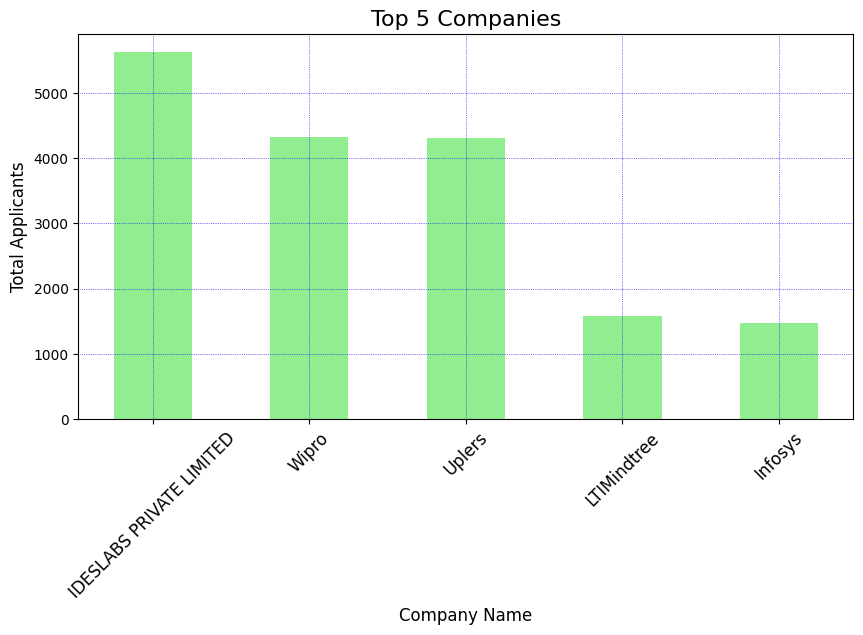

In [ ]:
# Group by company name and sum total applicants
top_companies = df.groupby('Name')['Total_applicants'].sum().reset_index()

# Sort by total applicants in descending order and get the top 5
top_5_companies = top_companies.sort_values(by='Total_applicants', ascending=False).head(5)

# Create a bar chart for the top 5 companies
plt.figure(figsize=(10,5))
plt.bar(top_5_companies['Name'], top_5_companies['Total_applicants'], color='lightgreen', width=0.5)
plt.xlabel('Company Name', fontsize=12)
plt.ylabel('Total Applicants', fontsize=12)
plt.title('Top 5 Companies', fontsize=16)
plt.xticks(rotation=45, fontsize=12)
plt.grid(color='blue', linestyle=':', linewidth=0.5)
plt.show()

*This graph represents the Top 5 Companies on Linkedin. Ideslabs Private Limited, Wipro and Uplers have 4000+ Applicants. Ideslabs Private Limited has highest number of Applicants whereas Infosys has lowest number of applicants.*

## **Popular 15 Job Desginations on Linkedin**

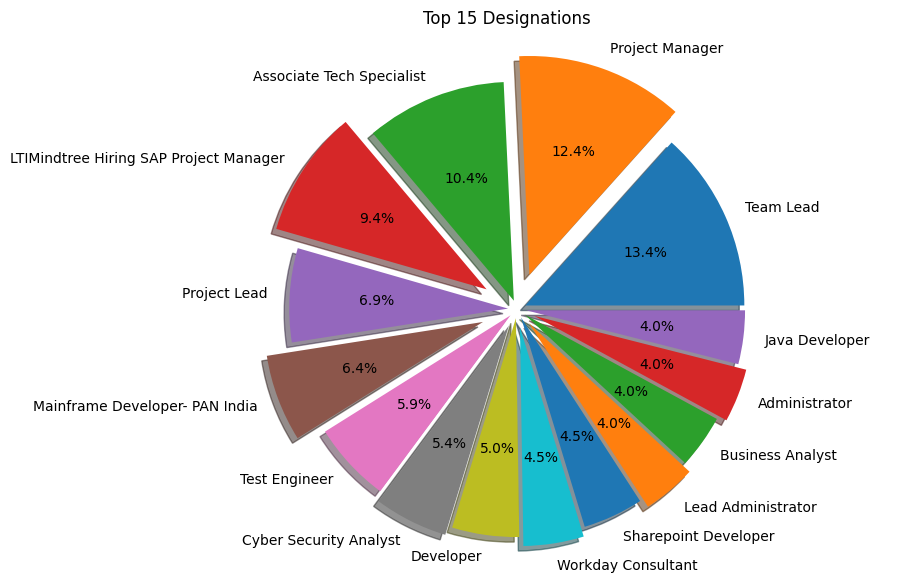

In [ ]:
#Pie Chart
# Group by designation and count occurrences
designation_counts = df['Designation'].value_counts()

# Get the top 15 designations
top_15_designations = designation_counts.head(15)

# Create a pie chart
plt.figure(figsize=(10, 7))
explode = [.05,.2,.05,.2,.05,.2,.05,.1,.05,.1,.05,.1,.05,.1,.05]
plt.pie(top_15_designations, labels=top_15_designations.index, radius=1.2, autopct='%0.01f%%', shadow=True, explode=explode)
plt.title('Top 15 Designations')
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is circular.
plt.show()

*This chart represents Top 15 designation on Linkedin where Team Lead has highest popularity followed by Project Manager whereas Lead Administrator, Administrator and Java Developer has lowest popularity.*

## **Popular Job States on Linkedin**

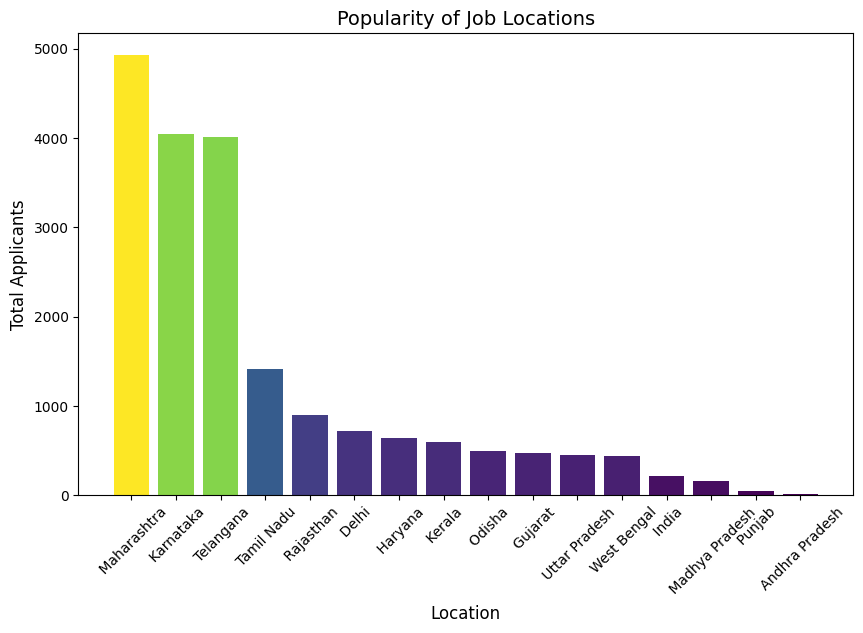

In [27]:
# Group by Location and count the total applicants for each location
location_counts = df.groupby('Location')['Total_applicants'].sum().reset_index()

# Sort the locations based on the number of applicants in descending order
location_counts = location_counts.sort_values(by='Total_applicants', ascending=False)

# Plotting the histogram
plt.figure(figsize=(10, 6))
#plt.bar(location_counts['Location'], location_counts['Total_applicants'], color='skyblue')
plt.bar(location_counts['Location'], location_counts['Total_applicants'],
        color=plt.cm.viridis(location_counts['Total_applicants'] / max(location_counts['Total_applicants'])))

plt.title('Popularity of Job Locations',fontsize=14)
plt.xlabel('Location',fontsize=12)
plt.ylabel('Total Applicants',fontsize=12)
plt.xticks(rotation=45)
plt.show()

*This graph represents the popular Job States where Maharashtra is most popular and have highest Applicants followed by Karnataka and Telangana whereas Andhra Pradesh has least popularity and Applicants.*

## **Designation Word Cloud**

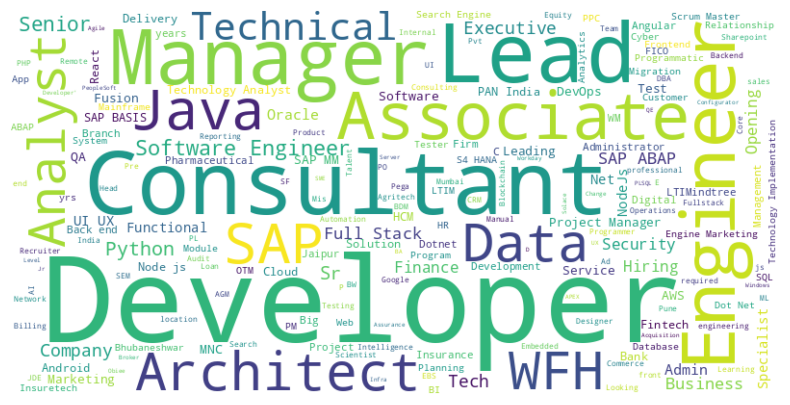

In [ ]:
# Get all unique designations from the 'Designation' column of the dataframe
Designation = df['Designation'].unique().tolist()
text = ' '.join(Designation)

# Create the word cloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## **Jobs according to each industry**

[Text(0, 0, '738')]

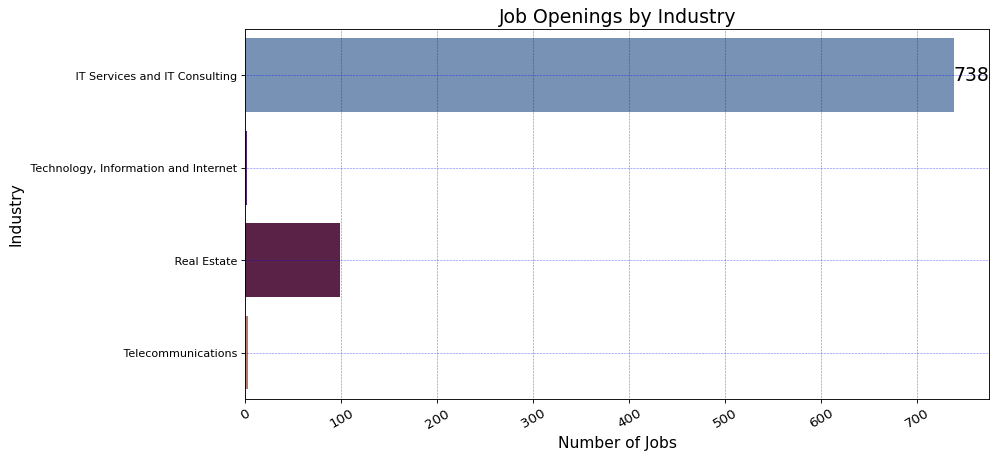

In [ ]:
# Visualizing Job Openings by Industry
plt.figure(figsize=(12,6), dpi=80)
chart2 = sns.countplot(df["Industry"], palette='twilight')
plt.title("Job Openings by Industry", size=17)
plt.ylabel("Industry", size=14)
plt.xlabel("Number of Jobs", size=14)
plt.xticks(rotation=30, fontsize=12)
plt.grid(color='blue', linestyle=':', linewidth=0.5)
chart2.bar_label(chart2.containers[0], size=17)

*This graph represents the Number of jobs available in each industry. Here we can see that IT services and It Consulting industry has highest number of jobs followed by Real Estate Industry whereas Technology, Information and Internet Industry as well as Telecommunications Industry has least number of jobs.*

## **Different Levels in Jobs**

[Text(0, 0, '825')]

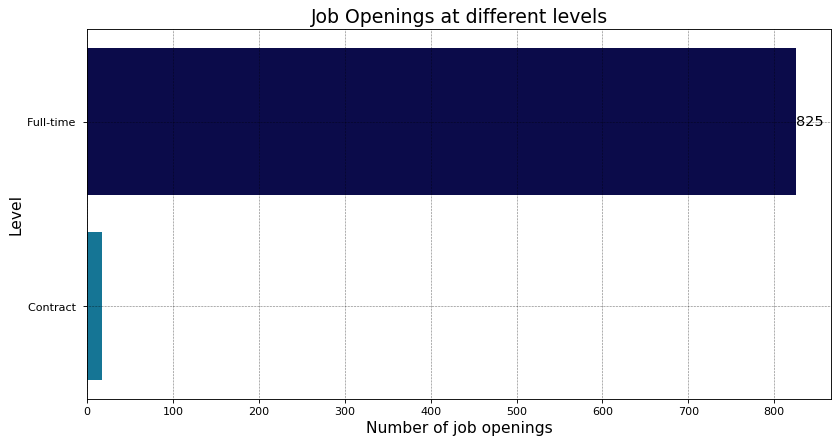

In [ ]:
#Job opening in each levels
# Create a figure and set the size and resolution
plt.figure(figsize=(12, 6), dpi=80)

# Plot a countplot of job openings at different levels
chart = sns.countplot(df["Level"], palette='ocean')

# Set the title and axis labels
plt.title("Job Openings at different levels", size=17)
plt.ylabel("Level", size=14)
plt.xlabel("Number of job openings", size=14)
plt.grid(color='black', linestyle=':', linewidth=0.5)

# Add labels to the bars
chart.bar_label(chart.containers[0], size=13)

*This graph represents the job available in diiferent levels i.e. Full-time or Contract basis. This graph shows that highest number of job opening are available at Full-time Level than Contract Level.*

## **Company branch in Top 10 Location**

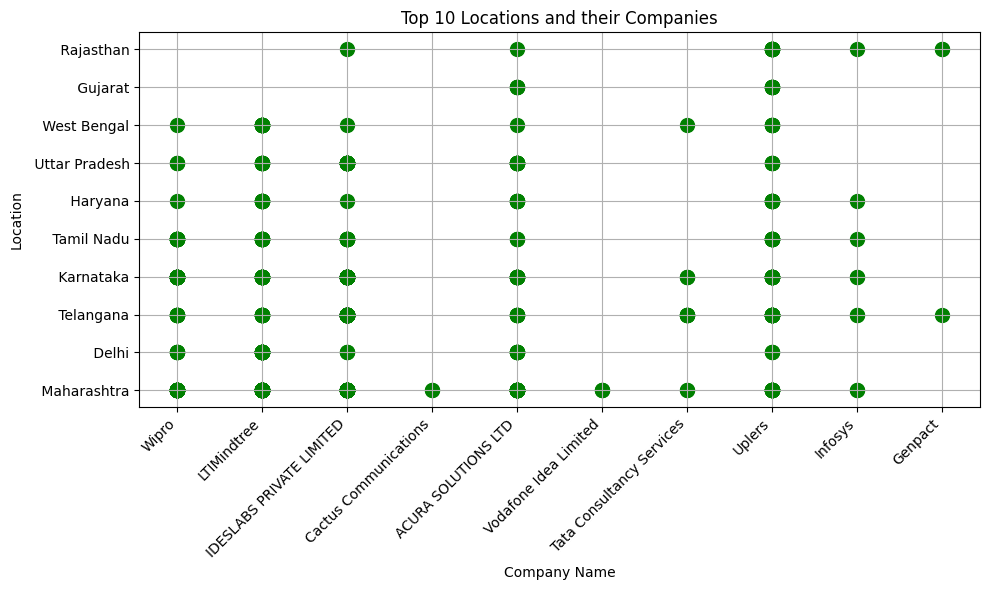

In [36]:
# Filter top 5 locations based on count
top_10_locations = df["Location"].value_counts().head(10).index
df_top_10 = df[df["Location"].isin(top_10_locations)]

# Scatter plot for top 5 locations
plt.figure(figsize=(10, 6))

# We will assign each unique "Location" a different color or marker for better visibility
plt.scatter(df_top_10["Name"], df_top_10["Location"], color='g', label='Top 5 Locations', s=100)

# Adding labels and title
plt.title("Top 10 Locations and their Companies")
plt.xlabel("Company Name")
plt.ylabel("Location")
plt.xticks(rotation=45)
plt.grid(True)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.tight_layout()
plt.show()

*This graph represents the Company branch in Top 10 States of India. Acura Solutions LTD and Uplers have their branch in all Top 10 States.*

*Maharashtra has highest number of Companies followed by Tamil Nadu and Gujarat has least number of company i.e. only one Company Infosys.*

## **Number of employees in each Company**

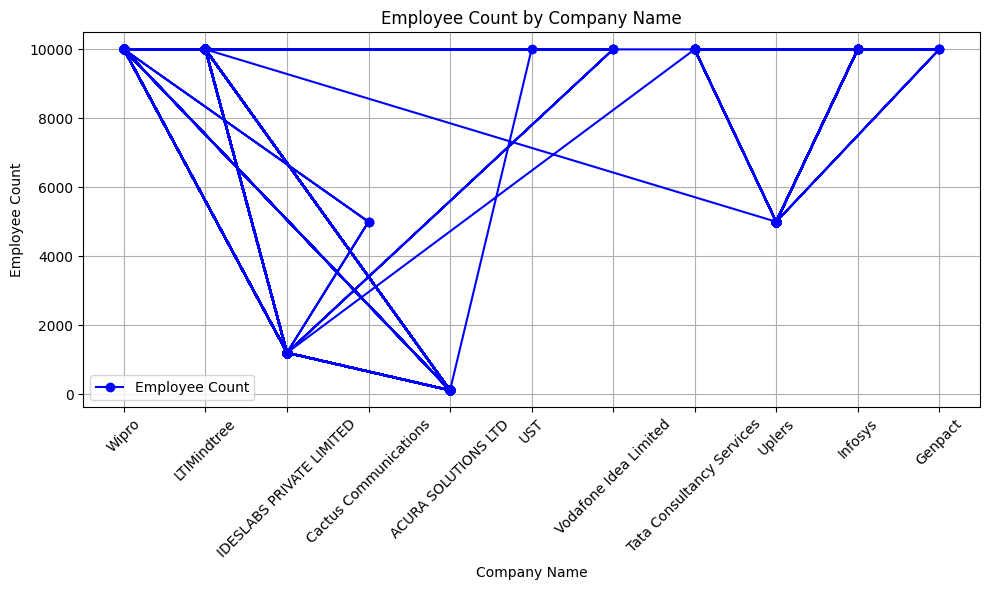

In [ ]:
# Line chart: Employee count by 'Name' (company)
plt.figure(figsize=(10, 6))
plt.plot(df["Name"], df["Employee_count"], marker='o', color='b', linestyle='-', label='Employee Count')

# Adding labels and title
plt.title("Employee Count by Company Name")
plt.xlabel("Company Name")
plt.ylabel("Employee Count")
plt.xticks(rotation=45)
plt.grid(True)

# Display the plot
plt.tight_layout()
plt.legend()
plt.show()

*This graph represents the number of Employees in each of the Companies. Looking into chart, Wipro, LTIMindtree, UST, Vodafone Idea Limited, Tata Consultancy Services, Infosys and Genpact has approximately 10000+ employees. On the otherhand Acura Solutions LTD has least number of employees.*

#**Conclusion**

**This LinkedIn data analysis project aimed to extract meaningful insights from job postings, focusing on key aspects such as company popularity, job designations, location preferences, and industry trends. The analysis involved several steps, including data cleaning, preprocessing, and visualization, to uncover patterns and relationships within the dataset.**